# Exploratory Data Analysis

Planning - Acquisition - Preparation - **Exploratory Analysis** - Modeling - Product Delivery

In this lesson, we introduce exploratory data analysis, called EDA, which is the "explore" stage in the DS Pipeline.

## Goals of EDA

We explore the interactions of the attributes and target variable to help discover drivers of our target variable and redundant or interdependent attributes. 

1. Discover features that are driving the outcome (target). (Number 1 reason to explore)
2. Learn the vast majority of our takeaways and interesting stories from the data. 
3. Discover if we need to drop features, if we need to handle missing values, or if there's value to combining features. 

## EDA Process

1. Hypothesize: Form and document your initial hypotheses about how the predictors (independent variables, features, or attributes) interact with the target (y-value or dependent variable). You can do this in the form of questions in a natural language (as opposed to "statistical" language). 

2. Visualize: use visualization techniques to identify drivers. When a visualization needs to be followed up with a statistical test, do so.

3. Test your hypotheses when visualization isn't immediately clear. Use the appropriate statistical tests (t-tests, correlation, chi-square)

**General Recipe**

1. Univariate Stats: descriptive stats, frequencies, histograms. This is often done during prep prior to splitting into train/validate/test, but if it is not, then it should be done first here. Why? Outliers. Running tests that assume normalcy. Scale of each variable. General "getting to know" your data. 

    - Univariate means a single variable, so we'll look at `.value_counts()` and histograms.
    - Explore the target variable itself. What is the distribution of values?  
    - Explore the categorical and qualitative variables. 
    - Explore the numeric variables. 


2. Bivariate Stats. Bivariate means two variables.

    - Plot the interactions of each variable with the target. Document your takeaways.     
    - Explore interation of independent variables using viz and/or hypothesis testing to address interdependence. 


3. Multivariate Stats (more than 2 variables): Ask additional questions of the data, such as how subgroups compare to each-other and to the overall population. Answer questions using visualizations and/or hypothesis testing. 

    - use color to represent a discrete variable and then choose a chart style based on the data types of other two variables. 

4. Statistical Tests: If the visualizations are not crystal clear, it's important to conduct hypothesis tests.

    - With numeric to numeric, test for correlation with Pearson's R for linear and Spearman's R for non-linear relationships.

    - For numeric to categorical, compare the means of two populations or a subgroup to the population using a [t-test](https://ds.codeup.com/stats/compare-means/), if your samples are normaly(ish) distributed but have different variances (as determined by calling `.var()` on each column/Series, [ANOVA](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) to compare means from more than 2 groups, or a [Mann-Whitney u-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) if the data does not match the [assumptions of a t-test](https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp).

    - With categorical to categorical variables, use $\chi^2$, [chi-squared test](https://ds.codeup.com/stats/compare-group-membership/).


**Standing Orders** for Exploration

- **Document** your initial questions or assumptions. Write them down (in your README or notebook) so they are concrete and not in your head.

- **Document** your takeaways after each visualization. Even if your takeaway is, "there is nothing interesting between *var1* and *target*". 

- **Document** your answer to each question. 

- When you run statistical tests to answer your questions, **Document** your null and alternative hypothesis, the test you run, the test results, and your conclusion. 

- **Document** your takeaways, in case that wasn't clear. It is a huge component of your final deliverable/analysis.

- **Document** your action plan.  What are your next steps and/or new questions based on what you have learned? I recommend documenting, continuing through all of your questions, and then going back and taking action only after you have answered your initial questions. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import scipy.stats as stats
import acquire
import prepare

## Aquire

Acquire Titanic data from our mySQL database

In [19]:
df = acquire.get_titanic_data()


In [20]:
# peek
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


## Prepare

Prepare the Titanic data. We apply the same steps before splitting so that we handle edge cases identically.

- drop deck since most of the data is missing
- drop rows where age or embarked is missing
- drop passenger_id, since it adds no new information
- drop class, as encoded values are in pclass
- create dummy vars & drop sex, embark_town

**Questions for 2nd draft** 

- Let's investigate and determine what are best options are for handling the missing ages

In [21]:
# prepare.prep_titanic(df)
df = prepare.prep_titanic(df)

In [22]:
# peek
df.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,1,0,71.2833,0,0,0,0
2,2,1,3,0,0,7.9250,1,0,0,1
3,3,1,1,1,0,53.1000,0,0,0,1
4,4,0,3,0,0,8.0500,1,1,0,1


**Split** data into Train, Validate, Test

In [23]:
train, val, test = prepare.split_data(df, 'survived')

In [24]:
# shape
train.shape, val.shape, test.shape

((534, 10), (178, 10), (179, 10))

In [25]:
# Stratification means we'll get even proportions of the target variable in each data set
train.survived.mean(), val.survived.mean(), test.survived.mean()

(0.3838951310861423, 0.38202247191011235, 0.3854748603351955)

## Univariate Exploration: Explore Individual Variables

### Goals

- Identify Outliers, and whether those are anomalies or data errors. 
- Identify distributions of numeric data. Statistical tests often assume a type of distribution, such as a normal distribution. 
- Get a sense of scale for each variable. 
- Get a good general understanding of your data.  
- Is your target balanced or imbalanced? 
- Are there variables with no entropy? 

### How

#### Numeric Variables

- `df.describe()`
- `series.hist()` 
- `sns.boxplot()`

#### Discrete Variables

- `series.value_counts()`
- `series.value_counts(normalize=True)`
- `sns.countplot()`

### Things to take away from this step

- Document findings at the end of the section (and throughout)
- Return to prep to further clean in ways discovered in this step
- Document questions that come up as you begin to look at the data. 

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             534 non-null    int64  
 1   survived                 534 non-null    int64  
 2   pclass                   534 non-null    int64  
 3   sibsp                    534 non-null    int64  
 4   parch                    534 non-null    int64  
 5   fare                     534 non-null    float64
 6   alone                    534 non-null    int64  
 7   sex_male                 534 non-null    uint8  
 8   embark_town_Queenstown   534 non-null    uint8  
 9   embark_town_Southampton  534 non-null    uint8  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 34.9 KB


In [37]:
# fare is the only continuous variable 

In [38]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_id,534.0,446.677903,257.471048,0.0,219.5000,452.5,672.7500,890.0000
survived,534.0,0.383895,0.486789,0.0,0.0000,0.0,1.0000,1.0000
pclass,534.0,2.323970,0.822928,1.0,2.0000,3.0,3.0000,3.0000
sibsp,534.0,0.514981,1.143856,0.0,0.0000,0.0,1.0000,8.0000
parch,534.0,0.352060,0.759941,0.0,0.0000,0.0,0.0000,5.0000
fare,534.0,31.058106,46.866121,0.0,7.8958,13.5,30.0531,512.3292
alone,534.0,0.627341,0.483966,0.0,0.0000,1.0,1.0000,1.0000
sex_male,534.0,0.651685,0.476883,0.0,0.0000,1.0,1.0000,1.0000
embark_town_Queenstown,534.0,0.086142,0.280837,0.0,0.0000,0.0,0.0000,1.0000
embark_town_Southampton,534.0,0.711610,0.453438,0.0,0.0000,1.0,1.0000,1.0000


In [39]:
# most passengers are in the 3rd class
# 65% men
# 71% came from Southhampton
# 63% are traveling alone
# 38% survived
# fare mean is $31, median is $14
# fare outlier likely

In [51]:
nums = ['fare']
cats = ['survived', 'pclass', 'sibsp', 'parch', 'alone', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton']

survived
0    329
1    205
Name: survived, dtype: int64
0    61.610487
1    38.389513
Name: survived, dtype: float64


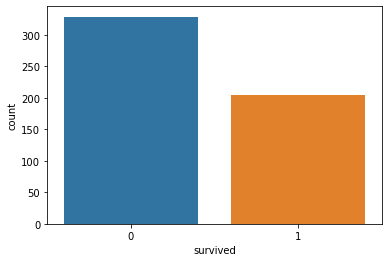

-------------
pclass
3    295
1    122
2    117
Name: pclass, dtype: int64
3    55.243446
1    22.846442
2    21.910112
Name: pclass, dtype: float64


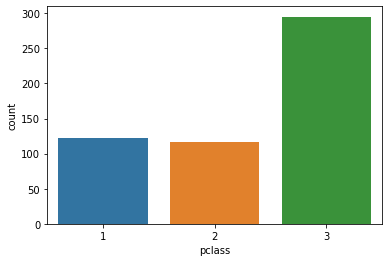

-------------
sibsp
0    378
1    106
2     22
3     10
4     10
8      5
5      3
Name: sibsp, dtype: int64
0    70.786517
1    19.850187
2     4.119850
3     1.872659
4     1.872659
8     0.936330
5     0.561798
Name: sibsp, dtype: float64


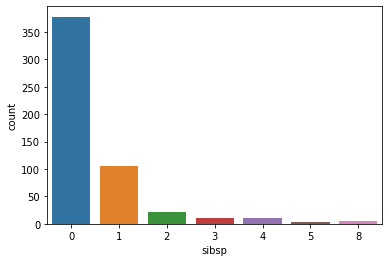

-------------
parch
0    414
1     67
2     45
3      4
5      3
4      1
Name: parch, dtype: int64
0    77.528090
1    12.546816
2     8.426966
3     0.749064
5     0.561798
4     0.187266
Name: parch, dtype: float64


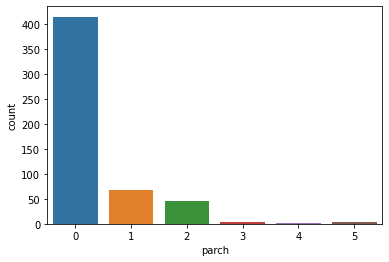

-------------
alone
1    335
0    199
Name: alone, dtype: int64
1    62.734082
0    37.265918
Name: alone, dtype: float64


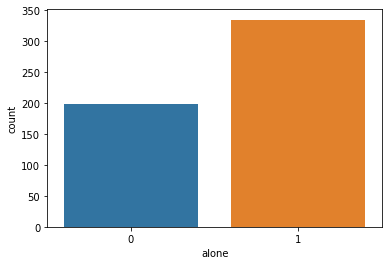

-------------
sex_male
1    348
0    186
Name: sex_male, dtype: int64
1    65.168539
0    34.831461
Name: sex_male, dtype: float64


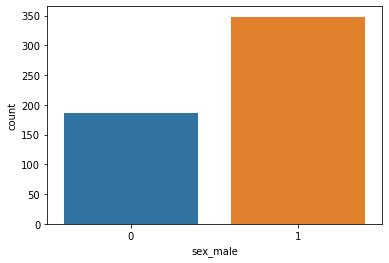

-------------
embark_town_Queenstown
0    488
1     46
Name: embark_town_Queenstown, dtype: int64
0    91.385768
1     8.614232
Name: embark_town_Queenstown, dtype: float64


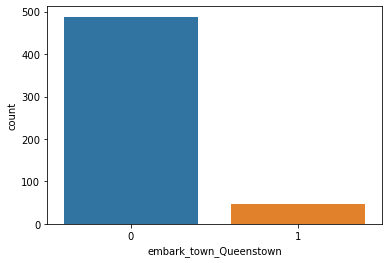

-------------
embark_town_Southampton
1    380
0    154
Name: embark_town_Southampton, dtype: int64
1    71.161049
0    28.838951
Name: embark_town_Southampton, dtype: float64


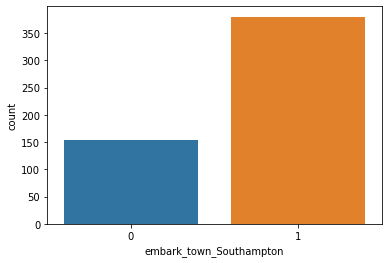

-------------


In [52]:
for col in cats:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()
    print('-------------')

In [47]:
# 55% are in third class

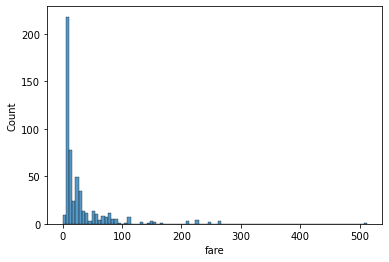

In [60]:
for col in nums:
    sns.histplot(x=col, data=train)
    plt.show()

In [61]:
# outlier at $500+, do we remove?

## Bivariate Exploration: Explore Interactions of 2 Variables

### Goals

- Analyze each feature with respect to the target variable and document takewaways. Always document your findings and takeaways, even if the takeaway is "There's nothing here between x and y". 
- Analyze features with respect to each other to identify those that may be interdependent and add no additional information. 
- Ask and answer specific questions. 

### How

#### Numeric x Numeric Variables

**Plots**

- `sns.scatterplot()`
- `sns.heatmap()`
- `sns.lineplot()`
- `sns.lmplot()`
- `sns.pairplot()`

**Stats**

- Pearson's R: tests for **LINEAR** correlation  `scipy.stats.pearsonr()` 
- Spearman's Rho: tests for monotonic relationships (not necessarily linear, relationship between ordered sets):  `scipy.stats.spearmanr()` 

#### Discrete x Numeric Variables

**Plots**

- `sns.swarmplot()`
- `sns.violinplot()`
- `sns.barplot()`
- `sns.stripplot()`
- `sns.boxenplot()`

**Stats**

- Independent t-test: compare the mean of two groups, are they significantlly different? `scipy.stats.ttest_ind()`
- ANOVA (one-way): compare the mean of more than two groups, are they significantlly different? `scipy.stats.f_oneway()`
- Mann-Whitney: compare the mean of two groups, when the data is not necessarily normally distributed, i.e. the non-parametric version of the t-test: `scipy.stats.mannwhitneyu()`
- Kruskal Wallis: compare the mean of more than two groups, when the data is not necessarily normally distributed, i.e. the non-parametric version of the ANOVA test `scipy.stats.kruskal()` 

#### Discrete x Discrete

**Plots**

- `sns.swarmplot()`
- `sns.countplot()` adding hue for the second discrete variable. 
- If one categorical is a boolean, such as survived in the titanic case, we can set the binary target to the `y` axis and see proportions by using: `sns.barplot()`, `sns.boxplot()`

**Stats**

- Crosstab comparing values `pd.crosstab()`
- Chi-Square test: is there a relationship between two categorical variables? `scipy.stats.chi2_contingency()`


### Things to take away from this step

- Document findings at the end of the section (and throughout)
- Return to prep to further clean in ways discovered in this step
- Document further questions to explore in multivariate exploration. 
- Document features you wish to move forward into modeling, and variables you wish to drop. 

In [63]:
# 1. Were certain classes more or less likely to survive?
# 2. Were females more likely to survive than males?
# 3. Were alone passengers more likely to survive?
# 4. Is there a relationship between fare and survival?

Text(0.5, 1.0, 'Third Class Less Likely to Survive')

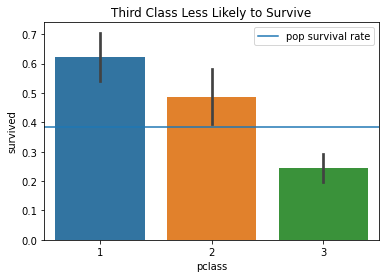

In [70]:
# 1. Were certain classes more or less likely to survive?
# compare 2 categorical variables -> class and survived
sns.barplot(data=train, x='pclass', y='survived')
pop_survival_rate = train.survived.mean()
plt.axhline(pop_survival_rate, label= 'pop survival rate')
plt.legend()
plt.title('Third Class Less Likely to Survive')

In [72]:
# test relationship of class to survival --> chi2

In [78]:
# Ho = no association between survival and class
# Ha = association between survival and class
α = 0.05

observed = pd.crosstab(train.pclass, train.survived)
chi2, p, degf, expected = stats.chi2_contingency(observed)
p < α
# reject Ho

True

In [81]:
# 2. Were females more likely to survive than males?

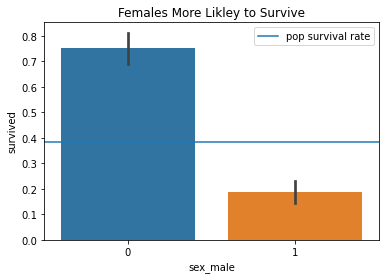

In [85]:
sns.barplot(data=train, x='sex_male', y='survived')
pop_survival_rate = train.survived.mean()
plt.axhline(pop_survival_rate, label= 'pop survival rate')
plt.title('Females More Likley to Survive')
plt.legend()

In [86]:
# Ho = no association between survival and sex
# Ha = association between survival and sex
α = 0.05

observed = pd.crosstab(train.sex_male, train.survived)
chi2, p, degf, expected = stats.chi2_contingency(observed)
p < α
# Reject Ho

True

## Multivariate Exploration: Explore the Interactions of 3+ Variables

### Goals

- Ask and answer specific questions: We ask more specific and targeted questions of the data, such as how subgroups compare to each-other and to the overall population.
- Identify relationships between independent variables (aka features, predictors) and dependent variable (aka target, outcome). 
- During multivariate analysis, we often add another dimension to our data, such as the target variable as color.

### How

**Plots**

- Add color to your plots. For seaborn plots, the argument is `hue=<colname>`. For maplotlib plots, the argument is `c=<yourseries>.astype('category').cat.codes`
- If you have multiple numeric columns, generating a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) with the target variable set to the `hue` argument might help. It may also be too noisy.
- A [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html) of a numeric x, a numeric y, and a `hue` argument using a category z. If you discover a good set of numeric columns in the `pairplot`, then it would be valuable to create a visual for that pairing along with the target.
- We can also use `hue` along with [seaborn catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)
- We can make subgroups based on multiple categorical features and compare to other groups or the population

**Stats**

- Multivariate statistical tests exist, but are outside the scope of this course. 

- We can, however, create subgroups based on multiple categorical features and conduct hypothesis tests. Using the same methods used in the bivariate exploration, you will begin by controlling for the third variable. For example, select only customers who are senior citizens ("control" for senior citizen), and then test whether there is a significant difference in cost for those who churn and those who do not churn. 


### Things to take away from this step

- Document takeaways, findings, conclusions at the end of the section and throughout. 
- Document initial recommendations. 
- Documnet new questions to ask of the data.
- Finalize features to move forward into modeling. 
- Return to prep step as needed. 

**Questions to answer**


_____________________



<AxesSubplot:xlabel='sex_male', ylabel='survived'>

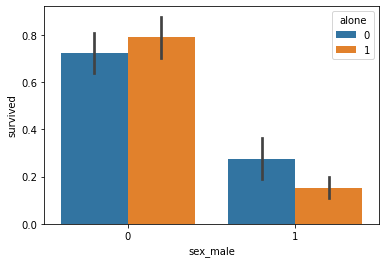

In [98]:
# Are females more likely to survive because they are less likely to travel alone?

sns.barplot(data=train, x='sex_male', y='survived', hue='alone')

In [117]:
# Do women traveling alone or not alont have a higher survival rate?
females = train[train.sex_male == 0]

α = 0.05
observed = pd.crosstab(females.alone, females.survived)
chi2, p, degf, expected = stats.chi2_contingency(observed)
p < α

# There is no difference in survival rate if traveling alone or not.

False

**Get Creative**

Ask additional, more specific and targeted questions of the data, such as how subgroups compare to each-other and to the overall population. We then answer these questions using visualizations and/or hypothesis testing.

1. Is there a relationship between survival and parch for women travelers?
2. Is there a relationship between survival and parch for male travelers? 
3. Is there a relationship between survival and sibsp for women travelers? 
4. Is there a relationship between survival and sibsp for male travelers?

What other subgroups can you create and visualize?

What variables have you not worked with yet?


What other subgroups can you create and test?

## Conclusion

Here we pull all of our takeaways and actions together into one place we can reference as we move forward. 



**Work fast to an MVP understanding of your data**

- Focus on features that give you the biggest bang for your buck. 

- If there's 30% of a population that's responsible for 99% of the sales, starting with breaking down that 30% population into different groups 


**When you have time for a second iteration**

- Revisit some of the things you may have skipped earlier in order to get to an MVP.

- For example, there were ~20% of rows with missing age. If you have time, check these out. Is there a set of the population that is similar such that we can impute an expected age value?

- Explore creating your own features

    - Turning numeric columns like `age` into a category with `is_child`, for example with a boolean.
    - Where does it make logical sense to combine columns  

## Exercises

### Part 1

Continue in your `classification_exercises.ipynb` notebook. As always, add, commit, and push your changes.

**Section 1 - iris_db:** Using iris data from our mySQL server and the methods used in the lesson above: 

1. Acquire, prepare & split your data. 

1. Univariate Stats

    - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()). 

    - For each species (categorical variable): create a frequency table and a bar plot of those frequencies. 

    - Document takeaways & any actions. 


2. Bivariate Stats

    - Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis). 

    - For each measurement type, compute the descriptive statistics for each species. 

    - For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types. 

    - Document takeaways & any actions. 


3. Multivariate Stats

    - Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species. 
    
    - Visualize two numeric variables by means of the species. Hint: `sns.relplot` with `hue` or `col`

    - Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

    - Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance). 

    - Document takeaways and any actions. 



### Part II

Explore your `titanic` dataset more completely.

- Determine drivers of the target variable
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

### Part III

- Explore your `telco` data to discover drivers of churn
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.